# Gender Prediction
Naive Bayes:
<img src="./naive_bayes.png">

In [1]:
#import
import nltk
import random

In [2]:
#import names from nltk library
from nltk.corpus import names

In [3]:
#check files
names.fileids()

['female.txt', 'male.txt']

In [4]:
#import visualization lib
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
%matplotlib inline

In [5]:
# check indicators according to facts
name_cfd = nltk.ConditionalFreqDist((fileid,name[-2:]) for fileid in names.fileids() for name in names.words(fileid))

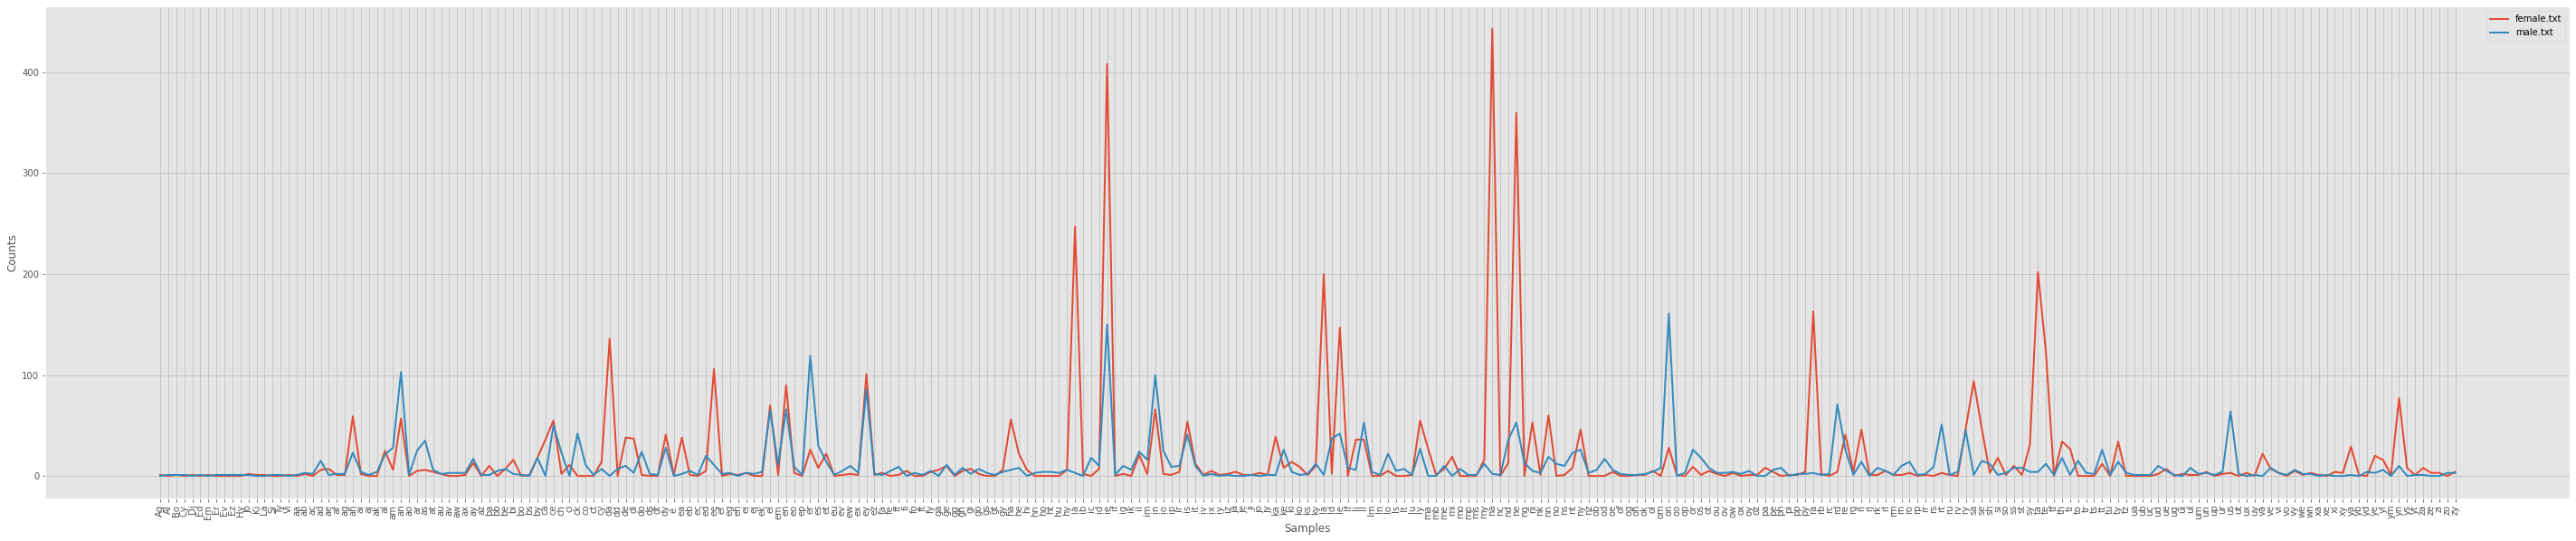

In [6]:
# visualisation
plt.figure(figsize=(50,10))
name_cfd.plot()

In [7]:
# get indicator pair
def name_features(name):
    return {"pair" : name[-2:]}

In [8]:
# check
name_features("Katy")

{'pair': 'ty'}

In [9]:
# join male and female names to name_list
name_list = [(name, "male") for name in names.words('male.txt')] + [(name,"female") for name in names.words('female.txt')]

In [10]:
# check top
name_list[:10]

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male'),
 ('Abbott', 'male'),
 ('Abby', 'male'),
 ('Abdel', 'male'),
 ('Abdul', 'male'),
 ('Abdulkarim', 'male')]

In [11]:
# check bottom
name_list[-10:]

[('Zonnya', 'female'),
 ('Zora', 'female'),
 ('Zorah', 'female'),
 ('Zorana', 'female'),
 ('Zorina', 'female'),
 ('Zorine', 'female'),
 ('Zsa Zsa', 'female'),
 ('Zsazsa', 'female'),
 ('Zulema', 'female'),
 ('Zuzana', 'female')]

In [12]:
# shuffle to randomize rows
random.shuffle(name_list)

In [13]:
# check (must be randomized)
name_list[:10]

[('Carmine', 'female'),
 ('Elspeth', 'female'),
 ('Farah', 'female'),
 ('Ardenia', 'female'),
 ('Carlene', 'female'),
 ('Angelle', 'female'),
 ('Yule', 'male'),
 ('Aimil', 'female'),
 ('Sholom', 'male'),
 ('Marti', 'female')]

In [14]:
# implement indicator pairs on randomized name lists
features = [ (name_features(name), gender) for (name,gender) in name_list]

In [15]:
# check
features[:10]

[({'pair': 'ne'}, 'female'),
 ({'pair': 'th'}, 'female'),
 ({'pair': 'ah'}, 'female'),
 ({'pair': 'ia'}, 'female'),
 ({'pair': 'ne'}, 'female'),
 ({'pair': 'le'}, 'female'),
 ({'pair': 'le'}, 'male'),
 ({'pair': 'il'}, 'female'),
 ({'pair': 'om'}, 'male'),
 ({'pair': 'ti'}, 'female')]

In [16]:
# check middle point
len(features)/2

3972.0

In [17]:
# split dataset 50:50 to training and testing set
training_set = features[:3972]
testing_set = features[3972:]

In [18]:
# set model
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [19]:
# import male names
male_names = names.words("male.txt")

In [20]:
# check whether carmello is not in the list
"Carmello" in male_names

False

In [21]:
# classification from the model
classifier.classify(name_features("Carmello"))

'male'

In [22]:
# models prediction value to testing set
nltk.classify.accuracy(classifier, testing_set)

0.7779456193353474